# AugmentoAPICLient

## Setup

In [1]:
from visual_utils import visualize_topic_hierarchy_3d
from augmento_client import AugmentoAPIClient

client = AugmentoAPIClient()
categorized = client.get_summary()["Topics"]["categorized_topics"]
visualize_topic_hierarchy_3d(categorized, logger=client.logger)


In [1]:
from augmento_client import AugmentoAPIClient

client = AugmentoAPIClient()
summary_path = client.summary_file

df = client.download_full_dataset(
    start_date="2024-01-01 00:00:00",
    end_date="2025-02-01 00:00:01",
    source="twitter",
    coin="bitcoin",
    bin_size="1H",
)

print(df.head())

2025-04-15 15:08:19,090 - INFO - Initializing AugmentoAPIClient...
2025-04-15 15:08:19,093 - INFO - Summary file exists at /Users/lucpellinger/Documents/Projects/BTC-Price-Prediction/src/augmento_client_assets/augmento_api_summary.json. Loading from file.
2025-04-15 15:08:19,096 - INFO - Cached file found at /Users/lucpellinger/Documents/Projects/BTC-Price-Prediction/src/augmento_client_assets/twitter_1H_20240101_20250201.parquet. Loading instead of downloading.
               datetime     t_epoch  twitter_hacks  \
0  2024-01-01T00:00:00Z  1704067200              0   
1  2024-01-01T01:00:00Z  1704070800              0   
2  2024-01-01T02:00:00Z  1704074400              0   
3  2024-01-01T03:00:00Z  1704078000              0   
4  2024-01-01T04:00:00Z  1704081600              0   

   twitter_pessimistic_doubtful  twitter_banks  twitter_selling  \
0                             0              0                0   
1                             1              0                1   
2      

/Users/lucpellinger/Documents/Projects/BTC-Price-Prediction/src/augmento_audit.py:52: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  available_times = pd.to_datetime(self.df["datetime"].dt.floor(freq_label).unique())
/Users/lucpellinger/Documents/Projects/BTC-Price-Prediction/src/augmento_audit.py:53: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_times = pd.date_range(start=available_times.min(), end=available_times.max(), freq=freq_label)


=== Missing Time Points (1H) ===
Total expected: 9529
Available:      9529
Missing:        0
✅ No missing time points detected.
=== Audit Report ===
Date range: 2024-01-01 00:00:00+00:00 → 2025-02-01 00:00:00+00:00
Total rows: 9529
Missing 1H intervals: 0
Duplicate timestamps: 0
Missing columns: 0
Unexpected columns: 0
Statistical summary available for 93 columns.
⚠️ Flagged columns with anomalies: ['twitter_hacks', 'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling', 'twitter_market_manipulation', 'twitter_de_centralisation', 'twitter_angry', 'twitter_etf', 'twitter_leverage', 'twitter_bottom', 'twitter_institutional_money', 'twitter_fomo', 'twitter_prediction', 'twitter_fearful_concerned', 'twitter_portfolio', 'twitter_fud_theme', 'twitter_whitepaper', 'twitter_announcements', 'twitter_technical_analysis', 'twitter_flippening', 'twitter_community', 'twitter_investing_trading', 'twitter_euphoric_excited', 'twitter_hodling', 'twitter_ico', 'twitter_bearish', 'twitter_goi

/Users/lucpellinger/Documents/Projects/BTC-Price-Prediction/src/augmento_audit.py:158: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  presence = df.index.floor(self.bin_size).to_series().value_counts().sort_index()
/Users/lucpellinger/Documents/Projects/BTC-Price-Prediction/src/augmento_audit.py:160: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(df.index.min(), df.index.max(), freq=self.bin_size), fill_value=0


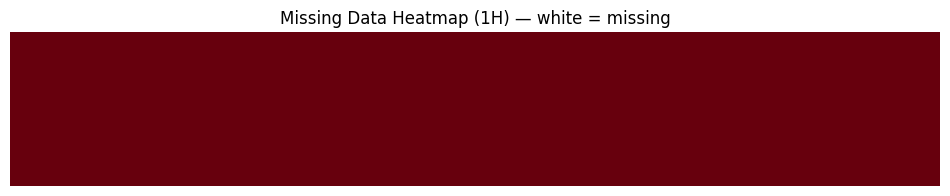

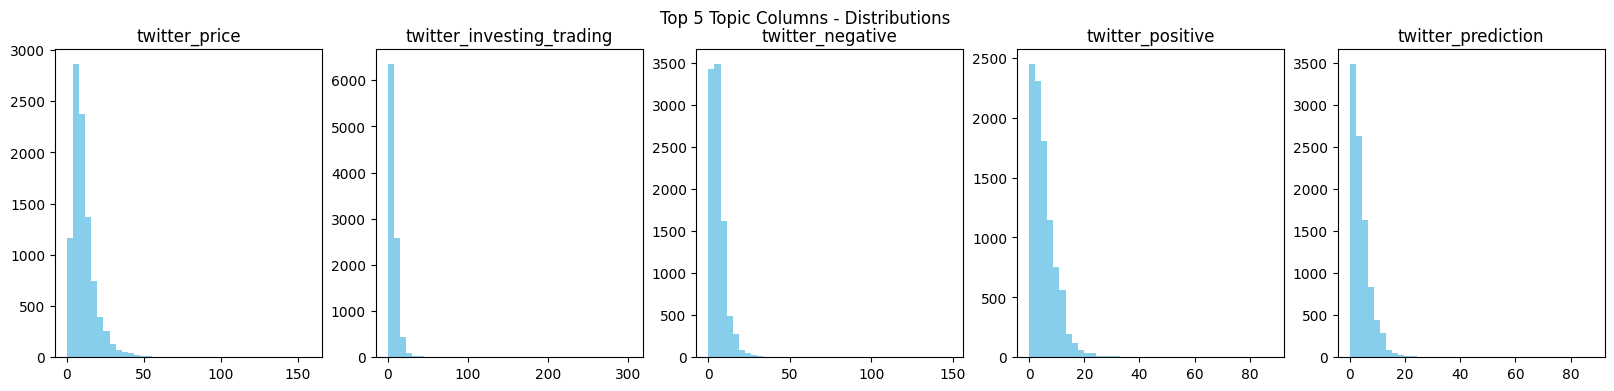

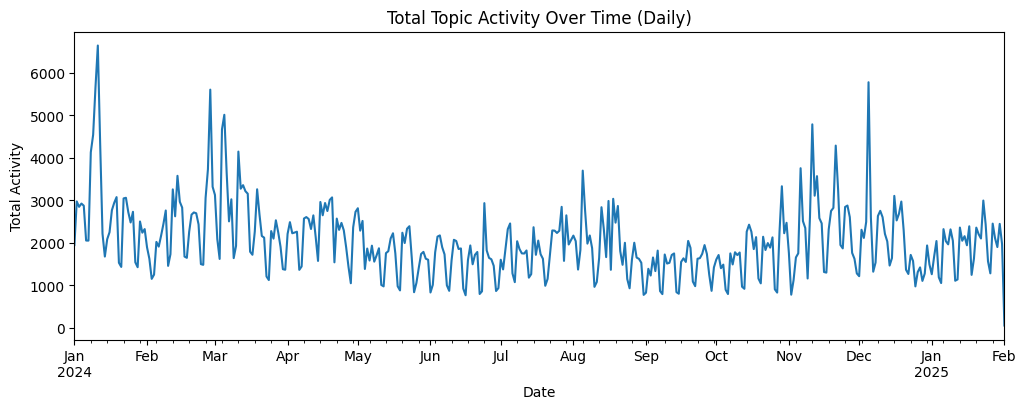

In [2]:
from augmento_audit import AugmentoClientAudit

auditor = AugmentoClientAudit.from_client(df, client, source="twitter", top_n_columns=5)
